In [11]:
# Importar librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from sklearn.metrics import mean_squared_error, mean_absolute_error

from pandas.tseries.offsets import MonthEnd 

In [8]:
# Cargar datos desde un archivo de Excel
file_path = 'Historical Product Demand.xlsx'
data = pd.read_excel(file_path)

Análisis Exploratorio

In [9]:
data.head()

,Product_Code,Warehouse,Product_Category,Date,Order_Demand
0,Product_0002,Whse_S,Category_005,2012-03-01,50000
1,Product_0002,Whse_S,Category_005,2012-05-02,50000
2,Product_0002,Whse_S,Category_005,2012-07-03,30000
3,Product_0002,Whse_S,Category_005,2012-09-05,10000
4,Product_0002,Whse_S,Category_005,2012-11-08,30000


In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1715 entries, 0 to 1714
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Product_Code      1715 non-null   object        
 1   Warehouse         1715 non-null   object        
 2   Product_Category  1715 non-null   object        
 3   Date              1715 non-null   datetime64[ns]
 4   Order_Demand      1715 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(3)
memory usage: 67.1+ KB


In [13]:
print(data.describe())

                                Date   Order_Demand
count                           1715    1715.000000
mean   2014-07-15 07:08:13.294460416    5510.262391
min              2011-12-16 00:00:00  -40000.000000
25%              2013-05-29 00:00:00     200.000000
50%              2014-08-08 00:00:00     400.000000
75%              2015-08-06 00:00:00    2000.000000
max              2016-12-29 00:00:00  500000.000000
std                              NaN   19901.842549


In [16]:
# Obtener los valores únicos de la columna 'Product Code'
unique_product_codes = data ['Product_Code'].unique()

#imprimir los valores unicos
print(unique_product_codes)

['Product_0002' 'Product_0001' 'Product_0003' 'Product_0004']


In [18]:
#obtener los valores unicos de l;a cou,na 'Product Code'
unique_product_codes = data['Warehouse'].unique()

#imprimir los valores unicos
print(unique_product_codes)

['Whse_S' 'Whse_J' 'Whse_C' 'Whse_A']


In [23]:
#data_0001.info()

In [32]:
#filtrar los datos de cada producto
data_0001 = data[data['Product_Code'] == 'Product_0001']
data_0002 = data[data['Product_Code'] == 'Product_0002']
data_0003 = data[data['Product_Code'] == 'Product_0003']
data_0004 = data[data['Product_Code'] == 'Product_0004']

#conmvertir la columna 'Date' a formato de fecha
data_0001.loc[:,'Date'] = pd.to_datetime (data_0001['Date'])
data_0002.loc[:,'Date'] = pd.to_datetime (data_0002['Date'])
data_0003.loc[:,'Date'] = pd.to_datetime (data_0003['Date'])
data_0004.loc[:,'Date'] = pd.to_datetime (data_0004['Date'])

#agrupar los datos por mes y sumar la demanda 
monthly_demand_0001 = data_0001.groupby(data_0001['Date'].dt.to_period('M').sum(numeric_only=True))
monthly_demand_0002 = data_0002.groupby(data_0002['Date'].dt.to_period('M').sum(numeric_only=True))
monthly_demand_0003 = data_0003.groupby(data_0003['Date'].dt.to_period('M').sum(numeric_only=True))
monthly_demand_0004 = data_0004.groupby(data_0004['Date'].dt.to_period('M').sum(numeric_only=True))

#Graficar las series de tiempo de la demanda
plt.figure(figsize=(12,6))
plt.plot(monthly_demand_0001.index.to_timestamp(), monthly_demand_0001['Order_Demand'], label='Product_0001')
plt.plot(monthly_demand_0002.index.to_timestamp(), monthly_demand_0002['Order_Demand'], label='Product_0002')
plt.plot(monthly_demand_0003.index.to_timestamp(), monthly_demand_0003['Order_Demand'], label='Product_0003')
plt.plot(monthly_demand_0004.index.to_timestamp(), monthly_demand_0004['Order_Demand'], label='Product_0004')
plt.title('Demanda Mensual de Productos')
plt.xlabel('Fecha')
plt.ylabel('Demanda')
plt.legend()
plt.show()



TypeError: 'PeriodArray' with dtype period[M] does not support reduction 'sum'

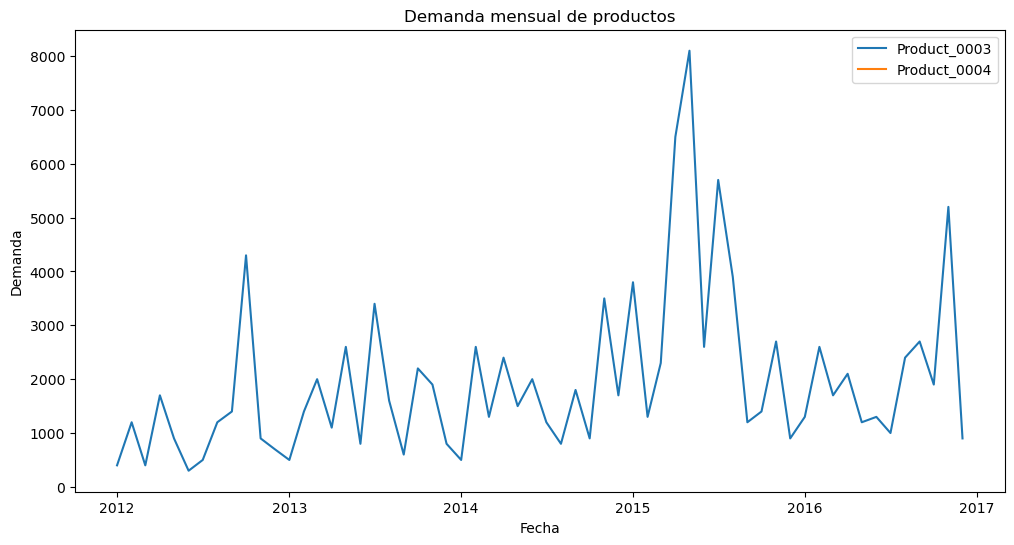

In [34]:

# Filtrar los datos para cada producto

data_0001 = data[data['Product_Code'] == 'Product_0001']
data_0002 = data[data['Product_Code'] == 'Product_0002']
data_0003 = data[data['Product_Code'] == 'Product_0003']
data_0004 = data[data['Product_Code'] == 'Product_0004']

# Convertir la columna 'Date' a formato de fecha

data_0001.loc[:,'Date'] = pd.to_datetime(data_0001['Date'])
data_0002.loc[:,'Date'] = pd.to_datetime(data_0002['Date'])
data_0003.loc[:,'Date'] = pd.to_datetime(data_0003['Date'])
data_0004.loc[:,'Date'] = pd.to_datetime(data_0004['Date'])

# Agrupar los datos por mes y sumar la demanda

monthly_demand_0001 = data_0001.groupby(data_0001['Date'].dt.to_period('M')).sum(numeric_only=True)
monthly_demand_0002 = data_0002.groupby(data_0002['Date'].dt.to_period('M')).sum(numeric_only=True)
monthly_demand_0003 = data_0003.groupby(data_0003['Date'].dt.to_period('M')).sum(numeric_only=True)
monthly_demand_0004 = data_0004.groupby(data_0002['Date'].dt.to_period('M')).sum(numeric_only=True)

# Graficar las series de tiempo de la demanda

plt.figure(figsize=(12, 6))
#plt.plot(monthly_demand_0001.index.to_timestamp(), monthly_demand_0001['Order_Demand'], label='Product_0001')
#plt.plot(monthly_demand_0002.index.to_timestamp(), monthly_demand_0002['Order_Demand'], label='Product_0002')
plt.plot(monthly_demand_0003.index.to_timestamp(), monthly_demand_0003['Order_Demand'], label='Product_0003')
plt.plot(monthly_demand_0004.index.to_timestamp(), monthly_demand_0004['Order_Demand'], label='Product_0004')

plt.title('Demanda mensual de productos')
plt.xlabel('Fecha')
plt.ylabel('Demanda')
plt.legend()
plt.show()

In [35]:
# Elegir producto a analizar
producto = 'Product_0001'

In [36]:
#filtrar los datos para producto
data_prod = data

In [ ]:
#Dividir 